In [1]:
# basic lib
import FinanceDataReader as fdr
import pandas_datareader.data as web
from datetime import datetime
import statsmodels.api as sm
from sklearn import metrics

import time
import random
import pandas as pd 
import glob
pd.options.display.max_rows=100

import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
%autosave 360
from matplotlib.gridspec import GridSpec
import seaborn as sns 

sns.set_style(style="darkgrid")

import re
import platform    
import warnings
warnings.filterwarnings(action='ignore')

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system.... sorry.....')
plt.rcParams['axes.unicode_minus'] = False
    

Autosaving every 360 seconds


In [2]:
# csv파일 한번에 가져오기
path = '/Users/tk/Documents/inflation' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=1)
df = frame.drop(['DATE','UNRATE','W825RC1'], axis=1)
data = df.set_index('monthly')
data = data.rename(columns={'CPALTT01USM657N':'CPI', 'NPPTTL':'Employment',
             'INDPRO':'Production', 'PIORECRUSDM':'Iron','GOLDAMGBD228NLBM':'Gold',
             'PCOPPUSDM':'Copper', 'POILWTIUSDM': 'WTI_Crude','DGS10':'US10Y'})
data = data.dropna()
data

,US10Y,CPI,Employment,Gold,Production,Iron,Copper,WTI_Crude
monthly,,,,,,,,
1/1/18,2.58,0.544775,125346.437,1332.8100,101.3561,75.782609,7065.852273,63.556957
2/1/18,2.86,0.453469,125674.267,1333.7750,101.6495,77.650000,7006.525000,62.150000
3/1/18,2.84,0.226113,125841.000,1326.5600,102.2980,71.318182,6799.178571,62.861364
4/1/18,2.87,0.397509,126102.265,1334.3700,103.4095,66.333333,6851.512500,66.320476
5/1/18,2.98,0.415892,126306.269,1303.6119,102.5408,66.630435,6825.273810,69.892609
6/1/18,2.91,0.159388,126443.638,1282.1200,103.3045,66.857143,6965.857143,67.522857
7/2/18,2.89,0.006746,126634.615,1238.0600,103.5474,67.045455,6250.750000,70.991364
8/1/18,2.89,0.055554,126794.662,1201.8600,104.1659,68.021739,6051.045455,67.988696
9/1/18,3.00,0.116203,126893.385,1199.2000,104.1315,68.800000,6050.762500,70.185500


In [3]:
inflation = data.drop(['Employment','Production'], axis=1)

In [4]:
returns = inflation.pct_change()
returns

,US10Y,CPI,Gold,Iron,Copper,WTI_Crude
monthly,,,,,,
1/1/18,NaN,NaN,NaN,NaN,NaN,NaN
2/1/18,0.108527,-0.167602,0.000724,0.024641,-0.008396,-0.022137
3/1/18,-0.006993,-0.501371,-0.005409,-0.081543,-0.029593,0.011446
4/1/18,0.010563,0.758014,0.005887,-0.069896,0.007697,0.055028
5/1/18,0.038328,0.046244,-0.023051,0.004479,-0.003830,0.053862
6/1/18,-0.023490,-0.616757,-0.016486,0.003402,0.020597,-0.033906
7/2/18,-0.006873,-0.957673,-0.034365,0.002817,-0.102659,0.051368
8/1/18,0.000000,7.234739,-0.029239,0.014562,-0.031949,-0.042296
9/1/18,0.038062,1.091695,-0.002213,0.011441,-0.000047,0.032311


In [5]:
returns['Direction'] = [1 if i > 0 else 0 for i in returns['US10Y']]

In [6]:
returns = sm.add_constant(returns)
returns = returns.dropna()

In [7]:
X = returns[['const','CPI','Gold','Iron','Copper','WTI_Crude']]

In [8]:
y = returns.Direction

In [9]:
model = sm.Logit(y,X)

In [10]:
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.448905
         Iterations 8


In [11]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                   38
Model:                          Logit   Df Residuals:                       32
Method:                           MLE   Df Model:                            5
Date:                Sat, 05 Jun 2021   Pseudo R-squ.:                  0.3524
Time:                        17:38:08   Log-Likelihood:                -17.058
converged:                       True   LL-Null:                       -26.340
Covariance Type:            nonrobust   LLR p-value:                  0.002318
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0192      0.444     -0.043      0.965      -0.890       0.851
CPI           -0.0022      0.022     -0.103      0.918      -0.044       0.040
Gold         -28.7840     17.135     -1.680      0.093     -62.368       4.800
Iron          -5.6403      6.818     -0.827      0.408     -19.002       7.722
Copper        25.9216     13.219      1.961      0.050       0.012      51.831
WTI_Crude      7.9062      6.849      1.154      0.248      -5.518      21.331
==============================================================================
"""

In [12]:
prediction = result.predict(X)

In [13]:
def confusion_matrix(act,pred):
    predtrans = ['Up' if i > 0.5 else 'Down' for i in pred]
    actuals = ['Up' if i > 0 else 'Down' for i in act]
    confusion_matrix = pd.crosstab(pd.Series(actuals),
                                   pd.Series(predtrans),
                                  rownames=['Actual'],
                                  colnames=['Predicted'])
    return confusion_matrix

In [14]:
confusion_matrix(y, prediction)

Predicted,Down,Up
Actual,,
Down,14,5
Up,2,17


<Figure size 432x288 with 0 Axes>

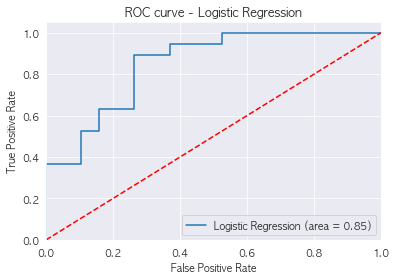

<Figure size 432x288 with 0 Axes>

In [15]:
# 결과값 시각화

model_roc_auc = metrics.roc_auc_score(y, result.predict(X))
fpr, tpr, thresholds = metrics.roc_curve(y, prediction)

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - Logistic Regression')
plt.legend(loc="lower right")
plt.figure()

## 미국 10년 국채의 방향성은 인플레이션에 영향을 주는 피쳐들과 같이 움직인다

In [16]:
growth= data.drop(['CPI','Gold','Iron','Copper','WTI_Crude'], axis=1)

In [17]:
growth_returns = growth.pct_change()
growth_returns

,US10Y,Employment,Production
monthly,,,
1/1/18,NaN,NaN,NaN
2/1/18,0.108527,0.002615,0.002895
3/1/18,-0.006993,0.001327,0.006380
4/1/18,0.010563,0.002076,0.010865
5/1/18,0.038328,0.001618,-0.008401
6/1/18,-0.023490,0.001088,0.007448
7/2/18,-0.006873,0.001510,0.002351
8/1/18,0.000000,0.001264,0.005973
9/1/18,0.038062,0.000779,-0.000330


In [18]:
growth_returns['Direction'] = [1 if i > 0 else 0 for i in growth_returns['US10Y']]

In [19]:
growth_returns = sm.add_constant(growth_returns)
growth_returns = growth_returns.dropna()
growth_returns

,const,US10Y,Employment,Production,Direction
monthly,,,,,
2/1/18,1.0,0.108527,0.002615,0.002895,1
3/1/18,1.0,-0.006993,0.001327,0.006380,0
4/1/18,1.0,0.010563,0.002076,0.010865,1
5/1/18,1.0,0.038328,0.001618,-0.008401,1
6/1/18,1.0,-0.023490,0.001088,0.007448,0
7/2/18,1.0,-0.006873,0.001510,0.002351,0
8/1/18,1.0,0.000000,0.001264,0.005973,0
9/1/18,1.0,0.038062,0.000779,-0.000330,1
10/1/18,1.0,0.050000,0.002057,-0.001384,1


In [20]:
X = growth_returns[['const','Employment', 'Production']]
y = growth_returns.Direction

In [21]:
model = sm.Logit(y,X)

In [22]:
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.531760
         Iterations 11


In [23]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                   38
Model:                          Logit   Df Residuals:                       35
Method:                           MLE   Df Model:                            2
Date:                Sat, 05 Jun 2021   Pseudo R-squ.:                  0.2328
Time:                        17:38:08   Log-Likelihood:                -20.207
converged:                       True   LL-Null:                       -26.340
Covariance Type:            nonrobust   LLR p-value:                  0.002171
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5646      0.760     -2.060      0.039      -3.053      -0.076
Employment  1015.7975    460.261      2.207      0.027     113.702    1917.893
Production   -29.7336     35.838     -0.830      0.407     -99.974      40.507
==============================================================================
"""

In [24]:
prediction = result.predict(X)

In [25]:
def confusion_matrix(act,pred):
    predtrans = ['Up' if i > 0.5 else 'Down' for i in pred]
    actuals = ['Up' if i > 0 else 'Down' for i in act]
    confusion_matrix = pd.crosstab(pd.Series(actuals),
                                   pd.Series(predtrans),
                                  rownames=['Actual'],
                                  colnames=['Predicted'])
    return confusion_matrix

In [26]:
confusion_matrix(y, prediction)

Predicted,Down,Up
Actual,,
Down,16,3
Up,6,13


<Figure size 432x288 with 0 Axes>

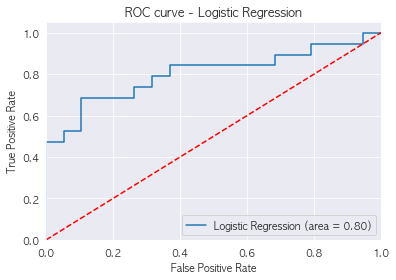

<Figure size 432x288 with 0 Axes>

In [28]:
# 결과값 시각화

model_roc_auc = metrics.roc_auc_score(y, result.predict(X))
fpr, tpr, thresholds = metrics.roc_curve(y, prediction)

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - Logistic Regression')
plt.legend(loc="lower right")
plt.figure()